# Проект: Исследование стартапов

Автор: Лапшина Виктория

Дата: 25.04.2025

------------

# Цели и задачи проекта

Цель проекта: Подготовить датасет и провести исследовательский анализ данных финансовой компании о стартапах с целью выявления показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.

Задачи:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - изучить данные более детально
   - изучить взаимосвязь данных о категории стартапов и количества раундов финансирования перед его покупкой
   - выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании
4. Сформулировать выводы по проведенному анализу.

Содержимое проекта:
1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации


## Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv
* fund.csv
* investment.csv



### Вывод общей информации, исправление названия столбцов

------

In [2]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3

In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Выгружаем данные v1 исправлено
PATH = "https://code.s3.yandex.net/datasets/"
acq_df = pd.read_csv(PATH + 'acquisition.csv')
comp_df = pd.read_csv(PATH + 'company_and_rounds.csv')
ppl_df = pd.read_csv(PATH + 'people.csv')
edu_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund_df = pd.read_csv(PATH + 'fund.csv')
invest_df = pd.read_csv(PATH + 'investment.csv')

In [5]:
# Выводим информацию о датасете acquisition
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [6]:
# Выводим первые строки acquisition
acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет acquisition.csv содержит информацию о покупках одними компаниями других компаний и состоит из 9407 строк и 6 столбцов:
- 4 столбца с типом данных `int64`, которые содержат числовые данные
- 2 столбца с типом данных `object` со строковыи данными. Столбец `acquired_at` хранит информацию о дате сделки - этот столбец лучше преобразовать к типу данных `datetime64`

In [7]:
# Выводим информацию о датасете company_and_rounds
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [8]:
# Выводим первые строки company_and_rounds
comp_df.head(10)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет company_and_rounds.csv содержит информацию о компаниях и раундах финансирования и состоит из 21774 строк и 22 столбцов:
- 12 столбцов с типом данных `float64`, которые содержат числовые данные
- 10 столбцов с типом данных `object` со строковыи данными. Столбцы `founded_at`, `closed at` и `funded  at` хранят информацию с датами - эти столбцы лучше преобразовать к типу данных `datetime64`

Также названия столбцов необходимо привести к snake_case для удобства при дальнейшем анализе. Также можно заметить, что в датасете есть два столбца с идентификатором компании - это столбцы с индентификаторами покупающих и покупаемых компаний, их необходимо прерименовать для простоты понимания.

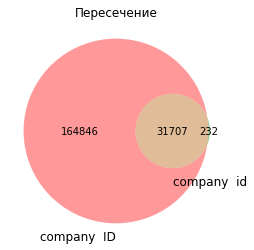

In [9]:
# Отображаем совпадение данных в столбцах с идентификаторами
first_id = set(comp_df['company  ID'].dropna().unique())
second_id = set(comp_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение")
plt.show() 

In [10]:
# Выводим информацию о датасете people
ppl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [11]:
# Выводим первые строки people
ppl_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет people.csv содержит информацию о сотрудниках и состоит из 226709 строк и 5 столбцов:
- 1 столбец с типом данных `float64` с числовыми данными
- 1 столбец с типом данных `int64`, которые содержат числовые данные
- 3 столбца с типом данных `object` со строковыи данными

In [12]:
# Выводим информацию о датасете education
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [13]:
# Выводим первые строки education
edu_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет education.csv содержит информацию об образовании сотрудника и состоит из 109610 строк и 4 столбцов:
- 2 столбца с типом данных int64, которые содержат числовые данные
- 2 столбца с типом данных object со строковыи данными. Столбец `graduated_at` содержит информацию о дате получения образования, его можно преобразовать к типу данных `datetime64`

Также можно заметиь ошибку в столбце `instituition`, который соджерждит информацию об учебном заведении - корректно будет переимновать столбец в `institution`

In [14]:
# Выводим информацию о датасете degrees
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [15]:
# Выводим первые строки degrees
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет degrees.csv содержит информацию о типе образования сотрудника и состоит из 109610 строк и 4 столбцов:
- 1 столбец с типом данных int64, которые содержат числовые данные
- 3 столбца с типом данных object со строковыи данными

### Смена типов и анализ пропусков

---------

In [16]:
# Приводим столбцы company_and_rounds к snake_case и меняем названия столбцов
comp_df = comp_df.rename(columns={'company  ID': 'acquiring_company_id', 'company  id': 'acquired_company_id'})
comp_df.columns = comp_df.columns.str.lower().str.replace('  ', '_')

In [17]:
# Переименуем столбец instituition
edu_df = edu_df.rename(columns={'instituition': 'institution'})

In [18]:
# Преобразуем тип данных столбцов с датами к типу datetime64
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'])
comp_df['closed_at'] = pd.to_datetime(comp_df['closed_at'])
comp_df['funded_at'] = pd.to_datetime(comp_df['funded_at'])
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'])

In [19]:
# Проверяем количество пропусков в каждом столбце
acq_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [20]:
# Считаем долю строк с пропусками
acq_df.isna().sum() / acq_df.shape[0] *100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

В датасете acquisition.csv пропуски содержатся в двух столбцах - `term_code` и `acquired_at`. Данные столбцы не нужны для последующего анализа, поэтоу пропуски в них можно опустить.

In [21]:
# Проверяем количество пропусков в каждом столбце
comp_df.isna().sum()

acquiring_company_id       302
name                       302
category_code            73888
status                     302
founded_at              107818
closed_at               214325
domain                   70615
network_username        122240
country_code            109167
investment_rounds          302
funding_rounds             302
funding_total              302
milestones                 302
funding_round_id        164846
acquired_company_id     164846
funded_at               165094
funding_round_type      164846
raised_amount           164846
pre_money_valuation     164846
participants            164846
is_first_round          164846
is_last_round           164846
dtype: int64

In [22]:
# Считаем долю строк с пропусками
comp_df.isna().sum() / comp_df.shape[0] * 100

acquiring_company_id     0.138676
name                     0.138676
category_code           33.928752
status                   0.138676
founded_at              49.509124
closed_at               98.416248
domain                  32.425818
network_username        56.131586
country_code            50.128574
investment_rounds        0.138676
funding_rounds           0.138676
funding_total            0.138676
milestones               0.138676
funding_round_id        75.695905
acquired_company_id     75.695905
funded_at               75.809784
funding_round_type      75.695905
raised_amount           75.695905
pre_money_valuation     75.695905
participants            75.695905
is_first_round          75.695905
is_last_round           75.695905
dtype: float64

В датасете company_and_rounds.csv пропуски содержатся во всех столбцах. Строки, которые не имеют информации о компаниях не представляют ценности для анализа, и их можно удалить.

Некоторые пропуски можно объяснить отсутствием информации о компаниях: например, в столбце `closed_at` пропуски могут указывать на то, что компания еще действующая; а в столбцах closed_at и network_username пропуски могут появиться в силу того, что у компании нет сайта.
Также довольно много пропусков есть в столбцах, содержащих информацию о раундах финансирования - информация есть только для 25% строк. Возможно данные столбцы появились в датасете позднее, и эти данные изначально были неизвестны или не зафиксированы.

In [23]:
# Проверяем количество пропусков в каждом столбце
ppl_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [24]:
# Считаем долю строк с пропусками
ppl_df.isna().sum() / ppl_df.shape[0] * 100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

В датасете people.csv пропуски содержатся во всех столбцах, кроме `id`. В столбцах `company_id` и `network_username` пропуски составляют более 80% и нет возможнолст заполнить их на основании других данных - дальнейший анализ по этим столбцам проводить будет некорректно.

In [25]:
# Проверяем количество пропусков в каждом столбце
edu_df.isna().sum()

id                  0
person_id           0
institution        55
graduated_at    51556
dtype: int64

In [26]:
# Считаем долю строк с пропусками
edu_df.isna().sum() / edu_df.shape[0]

id              0.000000
person_id       0.000000
institution     0.000502
graduated_at    0.470359
dtype: float64

В датасете education.csv пропуски содежратся в столбцах `instituition` и `graduated_at`. В столбце `instituition` процент пропусков незначителен, а в столбце `graduated_at` отсутствует примерно половина данных.

In [27]:
# Проверяем количество пропусков в каждом столбце
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [28]:
# Считаем долю строк с пропусками
degrees_df.isna().sum() / degrees_df.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

В датасете degrees.csv пропуски содежратся в столбцах `degree_type` и `subject` - 10% и 25% соответственно.

### Промежуточный вывод

Были проделаны следующие шаги:
- предоставленные датасеты были загружены, выведена информация о содержащихся данных
- в датасете company_and_rounds к единому стилю были приведены названия столбцов
- столбцы, хранящие информацию с датами были приведены к подходящему типу данных
- были проверены пропуски в столбцах: имеются столбцы, пропуски в окторых составляют довольно большой процент и проведение анализы на основании этих столбцов невозможно, в частности это столбцы в датасете company_and_rounds, а также столбцы `company_id` и `network_username` в датасете people.csv.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задачи: 
1. Составить сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
2. Оставить в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

3. На основе полученных данных ответить на вопросы:
- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

-------------------

In [29]:
# Создаем столбец с выделенным из даты годом и группируем данные
comp_df['funding_year'] = comp_df['funded_at'].dt.year
comp_df['cut_amount'] = comp_df['raised_amount']/1000000 #сокращаем данные до миллионов для простоты восприятия
grouped_df = comp_df.groupby('funding_year', as_index=False)['cut_amount'].agg(['median', 'count'])
filtered_df = grouped_df[grouped_df['count']>50]
filtered_df

,median,count
funding_year,,
1999.0,2.00000,76
2000.0,4.20000,125
2001.0,3.00000,96
2002.0,4.20000,116
2003.0,3.00000,159
2004.0,5.00000,291
2005.0,5.50000,1633
2006.0,5.00000,2436
2007.0,3.97332,3279


Максимальный типичный размер собранных в рамках одного раунда средств был зафиксирован в 2005 году - более 5 млн. рублей.

В 2013 году было зафиксировано максимальное количество раундов за весь период - 11072, при этом типичный размер средств принимает довольно низкие значения относительно других лет.


### Люди и их образование

Задачи:
1. Оценить, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделить все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации об образовании в каждой из групп.
2. Оценить, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

------------

In [31]:
# Объединяем датасеты people и education
merged_edu = ppl_df.merge(edu_df, left_on='id', right_on='person_id', suffixes = ('_people','_education'), how='left')
merged_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   institution       109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [32]:
# Проверяем на дубликаты
merged_edu.duplicated(subset=['first_name', 'last_name']).sum()

55036

In [33]:
# Удаляем дубликаты
merged_edu_copy = merged_edu.copy()
merged_edu_copy.drop_duplicates(subset=['first_name', 'last_name'])

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267685,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01
267688,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01


После объединения датасетов `people.csv` и `education.csv` можно заметить, что примерно для половины сотрудников данные об образовании отсутствуют. 
К данным датасетам также возможно присоединить датасет `degrees.csv`, так как во всех датасетах есть столбец с идентификатором сотрудника. Однако для этого будет необходимо обработать данный датасет:
- столбец с идентификатором сотрдуника необходимо преобразовать в соотвествующему другим датасетам виду и типу
- необходимо обработать дублирующихся сотрудников - некоторые сотрудники могли обучиться более, чем по одной специальности, поэтому одному сотруднику в датасете могут соответствовать несколько записей. Для присоединения необходимо будет в таблице оставить только одну запись о сотруднике - так не будут искажены результаты анализа.

In [34]:
# Группируем датафрейм по компаниям с кол-вом сотрудников
grouped_edu = merged_edu_copy.groupby('company_id', as_index=False).agg({'id_people': 'count', 'id_education': 'count'})
grouped_edu['nd_share'] = 100 - (grouped_edu['id_education'] / grouped_edu['id_people'] * 100) #столбец с долей сотрудников без инф-и об образовании
# Проверяем мин/макс значения по кол-ву сотрудников для дальнейшей категоризации:
grouped_edu.describe()

,company_id,id_people,id_education,nd_share
count,22922.000000,22922.000000,22922.000000,22922.000000
mean,102688.472646,1.953974,1.249367,45.829530
std,84842.926930,4.087373,3.405692,47.568617
min,1.000000,1.000000,0.000000,0.000000
25%,28844.500000,1.000000,0.000000,0.000000
50%,70878.500000,1.000000,1.000000,25.000000
75%,174083.500000,2.000000,2.000000,100.000000
max,286091.000000,376.000000,300.000000,100.000000


In [35]:
# Проверям кол-во компаний с разным кол-вом сотрудников
grouped_edu['id_people'].value_counts()

1      14150
2       4735
3       1857
4        831
5        447
6        259
7        161
8        115
9         86
11        52
10        51
13        26
12        25
18        16
15        14
14        12
16        12
19        10
20         9
17         8
25         4
27         3
22         3
44         2
39         2
24         2
35         2
30         2
34         2
26         2
29         2
28         1
221        1
59         1
43         1
46         1
71         1
42         1
89         1
73         1
376        1
64         1
23         1
70         1
21         1
84         1
52         1
66         1
192        1
80         1
111        1
Name: id_people, dtype: int64

In [36]:
# Разделяем комании на категории - не считаем компании с 0 сотрудников
bins   = [0, 1, 2, 3, 5, 10, 25, 400]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
grouped_edu['comp_category'] = pd.cut(grouped_edu['id_people'], bins=bins, labels=labels)
# Группируем по категории и считаем среднюю долю сотрудников без информации об образовании
grouped_category = grouped_edu.groupby('comp_category')['nd_share'].mean()
grouped_category

comp_category
1        59.229682
2        22.661035
3        22.742775
4-5      27.574335
6-10     31.174887
11-25    30.612547
26+      20.348174
Name: nd_share, dtype: float64

In [37]:
pd.cut(grouped_edu['id_people'], bins=bins, labels=labels)

0            3
1            1
2          4-5
3        11-25
4          26+
         ...  
22917        2
22918        1
22919        2
22920        1
22921     6-10
Name: id_people, Length: 22922, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4-5' < '6-10' < '11-25' < '26+']

Компании были разделены на несколько групп в зависимости от количества компаний с определенным количеством сотрудников: можно заметить, что команий с малым количеством сотрдуников гораздо больше, поэтому группы были выделены с более равномерным распределением.

Также была вычислена доля сотрудников без информации об образовании в каждой из групп. Меньше всего информации имеется у компаний с 1 сотрудником. Более полная информация об образовании у компании с численностью более 26 человек.

### Возможность объединения данных

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.
Задачи:
1. Установитье, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
2. Оценить, можно ли использовать столбцы с именем `network_username` для объединения данных.

----------

Столбец `network_username` встречается в следующих датасетах: `company_and_rounds`, `people` и  `fund`.

In [38]:
# Проверяем дублирование данных, исключив отсутствующие данные
comp_df_copy = comp_df.copy()
comp_df_copy = comp_df_copy[comp_df_copy['network_username'].notna()]
comp_df_copy.duplicated(subset='network_username').sum()

15963

 В датасете `company_and_rounds` содержит небольшое количество дубликатов, так как в датасете сожержится информация о раундах финансирования и для одной компании может быть несколько записей.

In [39]:
ppl_df_copy = ppl_df.copy()
ppl_df_copy = ppl_df_copy[ppl_df_copy['network_username'].notna()]
ppl_df_copy.duplicated(subset='network_username').sum()

446

In [40]:
fund_df_copy = fund_df.copy()
fund_df_copy = fund_df_copy[fund_df_copy['network_username'].notna()]
fund_df_copy.duplicated(subset='network_username').sum()

51


В датасетах `people` и `fund` также содержатся дубликаты, что возможно говорит о полностью дублирующихся строках.

По данному столбцу невозможно объелинить данные, так как не смотря на одинаковое название, в разных датасетах этот столбец хранит разную информацию:
- в датасете `company_and_rounds` - ник компании в сети
- в датасете `people` - ник сотрудника в социальных сетях
- в датасете `fund` - ник фонда в сети.
К тому же многие данные в этих столбцах отсутсвуют, что также затруднило бы объединение. Например, в датасете `people` в данном столбце отсутствует более 80% информации.

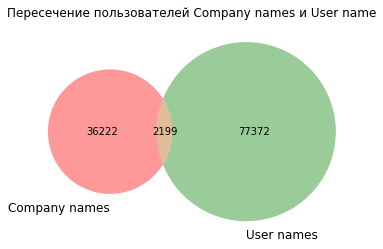

In [41]:
# Демонстрируем пересечение данных по network_username
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
set1 = set(ppl_df_copy['network_username'])
set2 = set(comp_df_copy['network_username'])
# Строим диаграмму Венна
venn2([set1, set2], set_labels=('Company names', 'User names'))

# Отображаем график
plt.title("Пересечение пользователей Company names и User name")
plt.show()   

На диаграмме можно увидеть, что между данными в датасетах company_and_rounds и people есть некоторые совпадния, однако их недостаточно, чтобы объединить датасеты. Это подтверждает, что столбцы хранят различную информацию.


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика возникли вопросы к датасету `company_and_rounds.csv`. В нём много пропусков в информации о раундах, которая заказчику важна.

Задачи:
- Привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний.
- Максимальным образом сохраняя данные,их связность и исключив возможные возникающие при этом ошибки, подготовить данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

--------------

In [42]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   acquiring_company_id  217472 non-null  float64       
 1   name                  217472 non-null  object        
 2   category_code         143886 non-null  object        
 3   status                217472 non-null  object        
 4   founded_at            109956 non-null  datetime64[ns]
 5   closed_at             3449 non-null    datetime64[ns]
 6   domain                147159 non-null  object        
 7   network_username      95534 non-null   object        
 8   country_code          108607 non-null  object        
 9   investment_rounds     217472 non-null  float64       
 10  funding_rounds        217472 non-null  float64       
 11  funding_total         217472 non-null  float64       
 12  milestones            217472 non-null  float64       
 13 

In [43]:
#Разделяем датасет company
company_df = comp_df.iloc[:, [0, 1, 2, 3, 4, 5, 8, 9, 10, 11]]
company_df.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0


In [44]:
# Убираем дубликаты
company_df = company_df.drop_duplicates()
company_df = company_df.dropna(subset=['acquiring_company_id'])
company_df

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,NaN,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
217462,183352.0,Mattress Source,NaN,operating,NaT,NaT,NaN,0.0,0.0,0.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,USA,0.0,4.0,44000000.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,USA,0.0,1.0,1300000.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,NaN,0.0,0.0,0.0


Было принято решение разделить датасет и вывести отдельную таблицу company, которавя содержит информацию о компаниях и столбцы, необходимые для дальнейшего анализа.


## Исследовательский анализ объединённых таблиц


### Объединение данных

Для начала необходимо объединить данные в единую таблицу.

В качестве основы для объединённой таблицы взяты данные из обработанного датасета `company_and_rounds.csv` — выбраны только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

----------

In [46]:
# Фильтруем таблицу company по критериям
company_df1 = company_df[(company_df['funding_rounds'] > 0)  | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
acq_df_copy = acq_df.iloc[:, [2, 4]]
companies_merged = company_df1.merge(acq_df_copy, left_on='acquiring_company_id', right_on='acquired_company_id', how='left')
companies_merged = companies_merged.drop('acquired_company_id', axis=1)

In [47]:
companies_merged.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0,NaN
1,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0,20000000.0
2,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,USA,0.0,1.0,5000000.0,47500000.0
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,USA,0.0,1.0,0.0,0.0


In [48]:
# Проверяем на дубликаты
companies_merged.duplicated().sum()

87

После фильтрации и объединения итоговой таблицы все еще сохраняются дубликаты - это может быть связано с тем, что в датасете company_and_rounds хранилась информация о нескольких раундах фианасирования одной компании. Так как в итоговой таблице есть столбец funding_rounds, хранящий информацию о количестве раундов, дубликаты можно удалить.

In [49]:
# Удаляем дубликаты
companies_merged = companies_merged.drop_duplicates()

In [50]:
companies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40803 entries, 0 to 40889
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acquiring_company_id  40803 non-null  float64       
 1   name                  40803 non-null  object        
 2   category_code         35365 non-null  object        
 3   status                40803 non-null  object        
 4   founded_at            27853 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   country_code          34792 non-null  object        
 7   investment_rounds     40803 non-null  float64       
 8   funding_rounds        40803 non-null  float64       
 9   funding_total         40803 non-null  float64       
 10  price_amount          9303 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 3.7+ MB


In [51]:
# Именим значения в столбцах funding_total и price_amount на млн
companies_merged['funding_total'] = companies_merged['funding_total'] / 1000000
companies_merged['price_amount'] = companies_merged['price_amount'] / 1000000
companies_merged.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39.75,NaN
1,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.00,20.0
2,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.00,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,USA,0.0,1.0,5.00,47.5
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,USA,0.0,1.0,0.00,0.0



### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

---------

<AxesSubplot:ylabel='funding_total'>

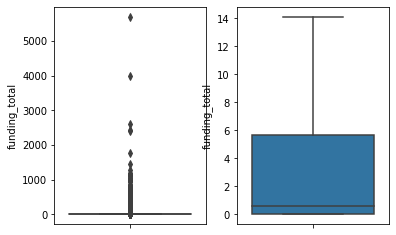

In [52]:
# Создаем boxplot с выбросами и без
f, axes = plt.subplots(1, 2)

sns.boxplot(y='funding_total', data=companies_merged,  orient='v' , ax=axes[0])
sns.boxplot(y='funding_total', data=companies_merged,  orient='v' , ax=axes[1], showfliers=False)

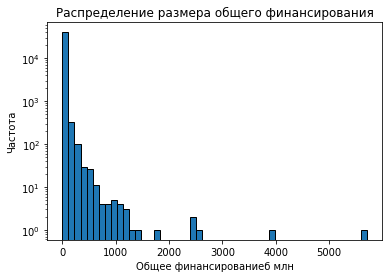

In [53]:
# Строим гистограмму
companies_merged.hist('funding_total',
                bins=50,
                edgecolor='black',
                log=True)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Общее финансированиеб млн')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На графиках можно увидеть, что в столбце funding_total довольно много экстремальных выбросов.

In [54]:
# используем метод describe
companies_merged.describe().round(2)

,acquiring_company_id,investment_rounds,funding_rounds,funding_total,price_amount
count,40803.00,40803.00,40803.00,40803.00,9303.00
mean,110431.91,0.15,1.29,10.14,397.31
std,90393.76,3.12,1.26,56.44,26971.45
min,1.00,0.00,0.00,0.00,0.00
25%,33712.00,0.00,1.00,0.00,0.00
50%,69479.00,0.00,1.00,0.60,0.00
75%,184657.50,0.00,2.00,5.65,0.08
max,286215.00,478.00,15.00,5700.00,2600000.00


После использования метода describe, который помогает увидеть основные показатели, можно сделать следующие выводы:
- данные содержат довольно много нулевых значений, поэтому большинство показателей находятся около нуля: 75% данных в столбце investment_rounds, 25% в столбце funding_total, 50% в столбце price_amount
- можно говорить о высоких выбросах в столбцах investment_rounds и funding_total:
    - в столбце investment_rounds 75 процентиль равняется 0, в то время как максимальное значение - 478
    - в столбце funding_rounds 75 процентиль составляет почти 6 млн, а максимальное значени е достигает 5700 млн
    - (v2) в столбцах наблюдается большая разница между сердним и медианным занчениями

Если отфильтровать в таблице нулевые данные и экстремальные выбросы, можно увидеть немного другую картину:

In [55]:
# Фильтр по investment_rounds
outliers1 = companies_merged['investment_rounds'].quantile(0.99)
f1 = companies_merged[(companies_merged['investment_rounds'] > 0) & (companies_merged['investment_rounds'] < outliers1)]

# Фильтр по funding_total
outliers2 = companies_merged['funding_total'].quantile(0.99)
f2 = companies_merged[(companies_merged['funding_total'] > 0) & (companies_merged['funding_total'] < outliers2)]

# Фильтр по price_amount
f3 = companies_merged[companies_merged['price_amount'] > 0]
display(f1['investment_rounds'].describe())
display(f2['funding_total'].describe())
display(f3['price_amount'].describe().round(2))

count    1963.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: investment_rounds, dtype: float64

count    27483.000000
mean        10.101373
std         18.627799
min          0.000291
25%          0.500000
50%          2.500000
75%         10.150000
max        133.663000
Name: funding_total, dtype: float64

count       2470.00
mean        1496.44
std        52336.12
min            0.00
25%           12.72
50%           56.20
75%          264.50
max      2600000.00
Name: price_amount, dtype: float64

<Figure size 504x216 with 0 Axes>

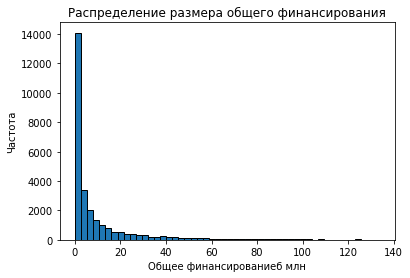

In [56]:
# Фильтруем выброс и нули
f_companies_merged = companies_merged[(companies_merged['funding_total'] < outliers2) & (companies_merged['funding_total'] > 0)]
plt.figure(figsize=(7, 3))

# Строим гистограмму
f_companies_merged.hist('funding_total',
                bins=50,
                edgecolor='black')

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Общее финансированиеб млн')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Без учета нулевых занчений и экстремальных выбросов можно увидеть, что типичный размер общего финансирования для компаний не превышает 2 млн.


### Анализ нулевых значений

Задачи:
1. Исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

2. Рассчитать аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и указать, каким процентилям границы соответствуют.

------------

In [57]:
# Фильтруем компании, купленные за 0-1 доллар с ненулевым объемом финансирования
filtered_companies = companies_merged[(companies_merged['price_amount'] <= 0.000001) & companies_merged['funding_total'] > 0]
filtered_companies

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,USA,0.0,7.0,121.50000,0.0
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,USA,0.0,3.0,4.00000,0.0
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,USA,0.0,1.0,0.25000,0.0
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,USA,0.0,3.0,1.31000,0.0
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,USA,0.0,2.0,44.92500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
40834,99.0,Amie Street,web,acquired,2011-07-04,NaT,USA,0.0,2.0,3.90000,0.0
40836,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,USA,0.0,2.0,5.17235,0.0
40840,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,USA,0.0,1.0,10.00000,0.0
40854,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,USA,0.0,1.0,14.50000,0.0


<AxesSubplot:>

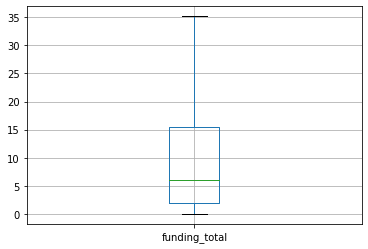

In [58]:
# Графическое представление разброса данных без выбросов
filtered_companies.boxplot(column='funding_total', showfliers=False)

In [59]:
# Рассчитываем границы выбросов
q1 = filtered_companies['funding_total'].quantile(0.25)
q3 = filtered_companies['funding_total'].quantile(0.75)
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
lower = max(0, lower)
new_df = filtered_companies[filtered_companies['funding_total'] < upper]
upper_perc = round(new_df['funding_total'].count() / filtered_companies['funding_total'].count() * 100, 2)
print(f'Верхняя граница выбросов для столбца "funding_total": {upper} млн, что соответствует {upper_perc} процентилю.')
print(f'Нижняя граница выбросов для столбца "funding_total": {lower} млн.')

Верхняя граница выбросов для столбца "funding_total": 35.5 млн, что соответствует 91.02 процентилю.
Нижняя граница выбросов для столбца "funding_total": 0 млн.



### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов необходимо выделить категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

-------------

In [60]:
# Вычисляем типичные цены и разброс, сортируем и выводим топ
outliers_ft = companies_merged['price_amount'].quantile(0.90)
categoires_gr = companies_merged[(companies_merged['price_amount'] > 0) & (companies_merged['price_amount'] < outliers_ft)]
categoires_gr = categoires_gr.groupby('category_code')['price_amount'].agg(['median','min', 'max', 'count'])
categoires_gr['price_dif'] = categoires_gr['max'] - categoires_gr['min']
categoires_gr = categoires_gr[categoires_gr['count'] > 50]
categoires_gr = categoires_gr.drop(['min', 'max', 'count'], axis=1)
categoires_gr = categoires_gr.sort_values(by=['median', 'price_dif'], ascending=False)
categoires_gr.head()

,median,price_dif
category_code,,
biotech,27.95,114.891000
advertising,27.70,118.990000
games_video,26.30,111.999940
mobile,26.20,104.995000
software,25.00,111.998142


Были выделены топ-5 категорий стартапов с наиболее типично высоким ценами и наибольшим разбросом цен. Типичные цены были рассчитаны по медиане, чтобы наличие экстремальных выбросов не влияло на усредненное значение. Разброс цен был hассчитан путем вычитания максимальных и минимальных значений. Данные отражены по категориям, которых есть 50 и более компаний для более достоверной статистики.


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построить график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

----------

In [62]:
# Вычисляем типичное значение количества раундов
status_gr = companies_merged.groupby('status')['funding_rounds'].median()
status_gr.sort_values()

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64

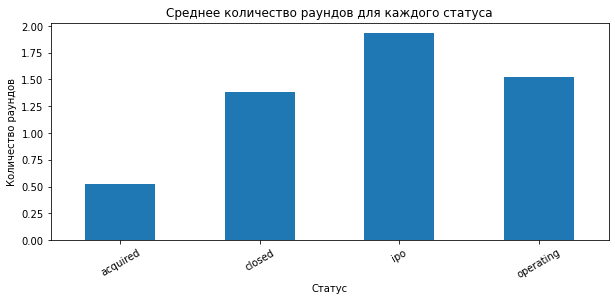

In [63]:
# Создаём контейнер графика и задаём размер 
plt.figure(figsize=(10, 4))

#Создаем сгруппированный df со средними значениями
status_gr1 = companies_merged.groupby('status')['funding_rounds'].mean()
status_gr1.sort_values()

# Строим столбчатую диаграмму
status_gr1.plot(
               kind='bar',
               rot=30,
               legend=False,
               title=f'Среднее количество раундов для каждого статуса'
)

# Настраиваем оформление графика
plt.xlabel('Статус')
plt.ylabel('Количество раундов')
# Выводим график
plt.show()

Типичное количество раундов для каждого статуса стартапа, кроме статуса `acquired` - 1. Для стартапов со статусом `acquired` это значение ниже. По графику можно увидеть, что для данного статуса среднее кличество раундов ~ 0,5, в то время как для статуса `ipo` это значение близко к 2.


## Итоговый вывод и рекомендации

---------

В ходе исследования был проанализирован большой массив данных о финансировании стартапов, в котром содрежались данные о компаниях, и сотрудниках, образовании сотрудлников, а также информация о покупках компании и раундах финансирования. Акцент исследования был сделан на том, чтобы проанализировать имеющийся массив данных на наличие достаточной информации для дальнешего анализа и выявления признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.

Довольно большая часть исследования была отведена на анализ предоставленных данных и их обработку. В ходе выполнения проекта были проведены следующие действия и сделаны соответствующие выводы:
- после знакомства с данными были замечены некоторые ошибки - схожие названия столбцов, некорректное название столбцов, неподходящие типы данных - данные были исправлены для удобства дальнейшей работы с ними
- в датасетах было обнаружено большое количество пропусков, в частности в датасете company and rounds пропуски в некоторых столбцах достигали 75%

В ходе предварительного исследования были сделаны следующие выводы по поставленным вопросам:
- Максимальный типичный размер собранных в рамках одного раунда средств был зафиксирован в 2005 году - более 5 млн. рублей. В 2013 году было зафиксировано максимальное количество раундов за весь период - 11072, при этом типичный размер средств принимает довольно низкие значения относительно других лет.
- После объединения датасетов people.csv и education.csv было замечено, что примерно для половины сотрудников данные об образовании отсутствуют. К данным датасетам есть возможность присоединить датасет degrees.csv, так как во всех датасетах есть столбец с идентификатором сотрудника, однако для этого необходима дополнительная обработка датасета.
- После распреденления компаний на несколько групп по количеству сотрудников выявлено, что как минимум 20% информации об образовании сотрудников отсутствует во всех категориях, при этом доля сотрудников без информации об образовании в компаниях с одним сотрудником гораздо выше - 59%.
- Столбец network_username, который содержится в нескольких таблицах не является подходящим для объединения данных, так как в каждом датасете столбец с данным названием хранит различную информацию

По итогу исследования датасета company and rounds было предположено, что некоторые столбцы с большим количеством появились в датасете позднее, и эти данные изначально были неизвестны или не зафиксированы. Вследствие, было приято решение разделить данный датасет на два, в одном из которых оставлена информация о компаниях, в другом - информация о раундах.
Полученные таблицы были дополнительно обработаны, а к таблице с информацией о компаниях были добавлены столбцы, необходимые для дальнейшего проведения исследования. 

В ходе исследования получившейся итоговой таблицы были сделалны следующе выводы:
- данные содержат довольно много нулевых значений, поэтому большинство показателей находятся около нуля: 75% данных в столбце investment_rounds, 25% в столбце funding_total, 50% в столбце price_amount
- можно говорить о высоких выбросах в столбцах investment_rounds и funding_total:
    - в столбце investment_rounds 75 процентиль равняется 0, в то время как максимальное значение - 478
    - в столбце funding_rounds 75 процентиль составляет почти 6 млн, а максимальное значение достигает 5700 млн
- в таблице есть данные о примерно 1500 компаний, которые были куплены за 0 или 1 доллар, при этом общий размер финансирования для них был ненулевым
- среди компаний были выделены топ-5 категорий с высокими ценами и наибольшим разбросом цен за стартап - ими стали компании следующих сфер: биотехнологии, реклама, видеоигры, мобильные бехнологии и программное обеспечение.  
- типичное количество раундов для каждого статуса стартапа, кроме статуса acquired - 1. Для стартапов со статусом acquired это значение ниже. По графику можно увидеть, что для данного статуса среднее кличество раундов ~ 0,5, в то время как для статуса ipo это значение близко к 2.

При анализе результатов исследования стоит иметь ввиду, что в данных содержится довольно большое количество пропусков и нулей, а также экстремально высоких выбросов, поэтому была высока вероятность искажения результатов.